In [1]:
import tensorflow as tf
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train = X_train/255.
X_test = X_test/255.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [3]:
# Define the labels of the dataset
CLASSES=["T-shirt/top","Trouser","Pullover","Dress","Coat",
        "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [4]:
# Change the pixel values to float32 and reshape input data
X_train = X_train.astype("float32").reshape(-1, 28, 28, 1)
X_test = X_test.astype("float32").reshape(-1, 28, 28, 1)

In [5]:
from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import *

In [6]:
def get_model():
    model = models.Sequential()
    model.add(Conv2D(16, (5, 5), activation="relu",
        input_shape=(28, 28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (5, 5), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation="relu"))
    model.add(Dense(len(CLASSES), activation="softmax"))
    return model
model_adam = get_model()

In [7]:
model_adam.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 20

history_adam = model_adam.fit(X_train, y_train, epochs=EPOCHS, 
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 244us/sample - loss: 0.5433 - accuracy: 0.8014 - val_loss: 0.4045 - val_accuracy: 0.8538
Epoch 2/20
60000/60000 [==============================] - 15s 253us/sample - loss: 0.3698 - accuracy: 0.8643 - val_loss: 0.3388 - val_accuracy: 0.8759
Epoch 3/20
60000/60000 [==============================] - 15s 251us/sample - loss: 0.3240 - accuracy: 0.8800 - val_loss: 0.3121 - val_accuracy: 0.8838
Epoch 4/20
60000/60000 [==============================] - 15s 251us/sample - loss: 0.2980 - accuracy: 0.8892 - val_loss: 0.2985 - val_accuracy: 0.8894
Epoch 5/20
60000/60000 [==============================] - 16s 258us/sample - loss: 0.2726 - accuracy: 0.8995 - val_loss: 0.2812 - val_accuracy: 0.8968
Epoch 6/20
60000/60000 [==============================] - 16s 268us/sample - loss: 0.2557 - accuracy: 0.9038 - val_loss: 0.2927 - val_accuracy: 0.8925
Epoch 7/20
60000/60000 [====================

In [10]:
adam_loss = history_adam.history['loss']
val_adam_loss = history_adam.history['val_loss']
adam_loss

[0.5433488198876381,
 0.3697721799850464,
 0.3239963876803716,
 0.297998796937863,
 0.27256654676000275,
 0.2556894413212935,
 0.24216369961102804,
 0.23058315359701714,
 0.22023093443612257,
 0.21070343412260215,
 0.204218804106613,
 0.19657936619222163,
 0.19057556170374154,
 0.1848457026720047,
 0.17878396322255333,
 0.1731083062713345,
 0.16792289560884238,
 0.1653332995797197,
 0.16138468467965722,
 0.1559130440235138]

In [8]:
model_sgd = get_model()
model_sgd.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 20

history_sgd = model_sgd.fit(X_train, y_train, epochs=EPOCHS, 
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 332us/sample - loss: 0.8707 - accuracy: 0.6796 - val_loss: 0.6169 - val_accuracy: 0.7731
Epoch 2/20
60000/60000 [==============================] - 20s 328us/sample - loss: 0.5633 - accuracy: 0.7933 - val_loss: 0.5063 - val_accuracy: 0.8178
Epoch 3/20
60000/60000 [==============================] - 18s 296us/sample - loss: 0.4961 - accuracy: 0.8208 - val_loss: 0.4576 - val_accuracy: 0.8397
Epoch 4/20
60000/60000 [==============================] - 18s 292us/sample - loss: 0.4567 - accuracy: 0.8339 - val_loss: 0.4326 - val_accuracy: 0.8449
Epoch 5/20
60000/60000 [==============================] - 17s 283us/sample - loss: 0.4283 - accuracy: 0.8448 - val_loss: 0.4081 - val_accuracy: 0.8561
Epoch 6/20
60000/60000 [==============================] - 17s 276us/sample - loss: 0.4098 - accuracy: 0.8531 - val_loss: 0.3890 - val_accuracy: 0.8623
Epoch 7/20
60000/60000 [====================

In [9]:
sgd_loss = history_sgd.history['loss']
val_sgd_loss = history_sgd.history['val_loss']
sgd_loss

[0.8706614430427552,
 0.5633002251466115,
 0.49605285127162935,
 0.4566754894216855,
 0.4282861596981684,
 0.4097593353947004,
 0.3919848745306333,
 0.37864206762711206,
 0.3649852955897649,
 0.3568409502108892,
 0.3457336262345314,
 0.33783370761672654,
 0.3320095214108626,
 0.3250878699461619,
 0.3187309743563334,
 0.31279777961770694,
 0.30827723851799965,
 0.3022780871291955,
 0.29920978839397433,
 0.29160798253417014]

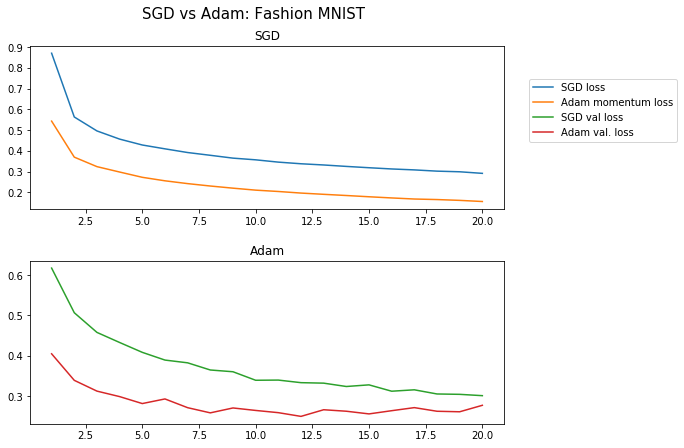

In [12]:
%matplotlib inline
def plot_losses(loss_1,loss_2, val_loss_1, val_loss_2,label1, label2):
    from numpy import linspace
    import matplotlib.pyplot as plt

    # Calling the axes.prop_cycle returns an itertoools.cycle

    color_cycle = plt.rcParams['axes.prop_cycle']()

    x = linspace(1, 20, 20)
    f1 = x*(1-x)   ; lab1 = label1 + ' loss'
    f2 = 0.25-f1   ; lab2 = label2 + ' momentum loss' 
    f3 = x*x*(1-x) ; lab3 = label1 + ' val loss'
    f4 = 0.25-f3   ; lab4 = label2 + ' val. loss'

    # let's plot our curves (note the use of color cycle, otherwise the curves colors in
    # the two subplots will be repeated and a single legend becomes difficult to read)
    fig, (a13, a24) = plt.subplots(2)

    a13.plot(x, loss_1, label=lab1, **next(color_cycle))
    a13.plot(x, loss_2, label=lab2, **next(color_cycle))
    a13.set_title(label1)
    a24.plot(x, val_loss_1, label=lab3, **next(color_cycle))
    a24.plot(x, val_loss_2, label=lab4, **next(color_cycle))
    a24.set_title(label2)
    # so far so good, now the trick

    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

    #fig.legend(lines, labels)
    fig.legend(
      lines,
      labels,
      bbox_to_anchor=(1.35, 0.875),
      bbox_transform=plt.gcf().transFigure,
    )
    fig.suptitle(label1 + ' vs ' + label2 + ': Fashion MNIST',fontsize=15, y=1.03)
    fig. tight_layout(pad=0.15)
    fig.set_size_inches(7,6, forward=True)
    plt.show()
plot_losses(sgd_loss,adam_loss, val_sgd_loss, val_adam_loss,'SGD', 'Adam')

In [16]:
model_adadelta = get_model()
model_adadelta.compile(optimizer='adadelta',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 20

history_adadelta = model_adadelta.fit(X_train, y_train, epochs=EPOCHS, 
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 222us/sample - loss: 2.3052 - accuracy: 0.1419 - val_loss: 2.2653 - val_accuracy: 0.2812
Epoch 2/20
60000/60000 [==============================] - 14s 228us/sample - loss: 2.2448 - accuracy: 0.2411 - val_loss: 2.2047 - val_accuracy: 0.3799
Epoch 3/20
60000/60000 [==============================] - 12s 200us/sample - loss: 2.1845 - accuracy: 0.3169 - val_loss: 2.1289 - val_accuracy: 0.4808
Epoch 4/20
60000/60000 [==============================] - 13s 218us/sample - loss: 2.1046 - accuracy: 0.3907 - val_loss: 2.0281 - val_accuracy: 0.5044
Epoch 5/20
60000/60000 [==============================] - 17s 286us/sample - loss: 1.9989 - accuracy: 0.4429 - val_loss: 1.8999 - val_accuracy: 0.5103
Epoch 6/20
60000/60000 [==============================] - 22s 372us/sample - loss: 1.8693 - accuracy: 0.4695 - val_loss: 1.7511 - val_accuracy: 0.5171
Epoch 7/20
60000/60000 [====================

In [18]:
model_adagrad = get_model()
model_adagrad.compile(optimizer='adagrad',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 20

history_adagrad = model_adagrad.fit(X_train, y_train, epochs=EPOCHS, 
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 224us/sample - loss: 0.8688 - accuracy: 0.6852 - val_loss: 0.6949 - val_accuracy: 0.7424
Epoch 2/20
60000/60000 [==============================] - 13s 212us/sample - loss: 0.6956 - accuracy: 0.7411 - val_loss: 0.6441 - val_accuracy: 0.7601
Epoch 3/20
60000/60000 [==============================] - 13s 222us/sample - loss: 0.6528 - accuracy: 0.7568 - val_loss: 0.6166 - val_accuracy: 0.7742
Epoch 4/20
60000/60000 [==============================] - 13s 215us/sample - loss: 0.6270 - accuracy: 0.7662 - val_loss: 0.5965 - val_accuracy: 0.7809
Epoch 5/20
60000/60000 [==============================] - 13s 217us/sample - loss: 0.6076 - accuracy: 0.7749 - val_loss: 0.5818 - val_accuracy: 0.7901
Epoch 6/20
60000/60000 [==============================] - 13s 216us/sample - loss: 0.5961 - accuracy: 0.7805 - val_loss: 0.5702 - val_accuracy: 0.7926
Epoch 7/20
60000/60000 [====================

In [20]:
model_adamax = get_model()
model_adamax.compile(optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 20

history_adamax = model_adamax.fit(X_train, y_train, epochs=EPOCHS, 
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 240us/sample - loss: 0.6259 - accuracy: 0.7736 - val_loss: 0.4787 - val_accuracy: 0.8308
Epoch 2/20
60000/60000 [==============================] - 13s 221us/sample - loss: 0.4381 - accuracy: 0.8421 - val_loss: 0.4060 - val_accuracy: 0.8518
Epoch 3/20
60000/60000 [==============================] - 12s 206us/sample - loss: 0.3890 - accuracy: 0.8586 - val_loss: 0.3803 - val_accuracy: 0.8634
Epoch 4/20
60000/60000 [==============================] - 12s 206us/sample - loss: 0.3605 - accuracy: 0.8695 - val_loss: 0.3456 - val_accuracy: 0.8764
Epoch 5/20
60000/60000 [==============================] - 12s 205us/sample - loss: 0.3365 - accuracy: 0.8774 - val_loss: 0.3284 - val_accuracy: 0.8810
Epoch 6/20
60000/60000 [==============================] - 12s 200us/sample - loss: 0.3186 - accuracy: 0.8848 - val_loss: 0.3207 - val_accuracy: 0.8830
Epoch 7/20
60000/60000 [====================

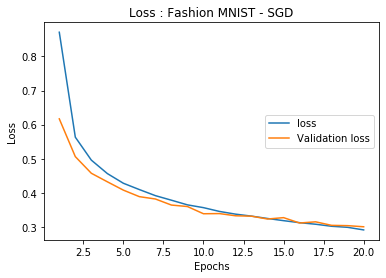

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(1, 21), sgd_loss, label='loss')
plt.plot(range(1, 21), val_sgd_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss : Fashion MNIST - SGD')
plt.legend(loc='right')
plt.show()

In [27]:
model_sgd_m = get_model()
optimizer_sgd_m = tf.keras.optimizers.SGD(momentum=0.9)
model_sgd_m.compile(optimizer=optimizer_sgd_m ,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 20

history_sgd_m = model_sgd_m.fit(X_train, y_train, epochs=EPOCHS, 
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 270us/sample - loss: 0.5695 - accuracy: 0.7921 - val_loss: 0.4011 - val_accuracy: 0.8551
Epoch 2/20
60000/60000 [==============================] - 15s 252us/sample - loss: 0.3767 - accuracy: 0.8620 - val_loss: 0.3549 - val_accuracy: 0.8710
Epoch 3/20
60000/60000 [==============================] - 15s 243us/sample - loss: 0.3352 - accuracy: 0.8781 - val_loss: 0.3177 - val_accuracy: 0.8835
Epoch 4/20
60000/60000 [==============================] - 14s 237us/sample - loss: 0.3093 - accuracy: 0.8854 - val_loss: 0.3076 - val_accuracy: 0.8886
Epoch 5/20
60000/60000 [==============================] - 15s 255us/sample - loss: 0.2942 - accuracy: 0.8909 - val_loss: 0.3022 - val_accuracy: 0.8899
Epoch 6/20
60000/60000 [==============================] - 16s 272us/sample - loss: 0.2764 - accuracy: 0.8964 - val_loss: 0.2986 - val_accuracy: 0.8898
Epoch 7/20
60000/60000 [====================

In [25]:
model_sgd_m_n = get_model()
optimizer_sgd_m_nestrov= tf.keras.optimizers.SGD(momentum=0.9,nesterov=True)
model_sgd_m_n.compile(optimizer=optimizer_sgd_m_nestrov ,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 20

history_sgd_m_nestrov = model_sgd_m_n.fit(X_train, y_train, epochs=EPOCHS, 
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 257us/sample - loss: 0.5590 - accuracy: 0.7921 - val_loss: 0.3870 - val_accuracy: 0.8599
Epoch 2/20
60000/60000 [==============================] - 16s 260us/sample - loss: 0.3689 - accuracy: 0.8652 - val_loss: 0.3350 - val_accuracy: 0.8792
Epoch 3/20
60000/60000 [==============================] - 14s 237us/sample - loss: 0.3295 - accuracy: 0.8788 - val_loss: 0.3145 - val_accuracy: 0.8848
Epoch 4/20
60000/60000 [==============================] - 14s 239us/sample - loss: 0.3017 - accuracy: 0.8884 - val_loss: 0.3038 - val_accuracy: 0.8869
Epoch 5/20
60000/60000 [==============================] - 14s 241us/sample - loss: 0.2848 - accuracy: 0.8953 - val_loss: 0.2911 - val_accuracy: 0.8932
Epoch 6/20
60000/60000 [==============================] - 17s 286us/sample - loss: 0.2727 - accuracy: 0.8982 - val_loss: 0.2891 - val_accuracy: 0.8943
Epoch 7/20
60000/60000 [====================

In [28]:
sgd_m_n_loss = history_sgd_m_nestrov.history['loss']
val_sgd_m_n_loss = history_sgd_m_nestrov.history['val_loss']
sgd_m_loss = history_sgd_m.history['loss']
val_sgd_m_loss = history_sgd_m.history['val_loss']
#sgd_m_loss

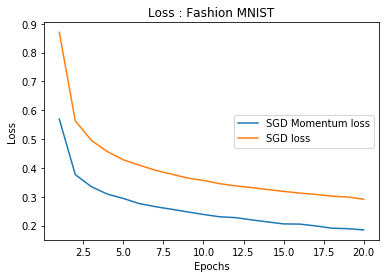

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(1, 21), sgd_m_loss, label='SGD Momentum loss')
plt.plot(range(1, 21), sgd_loss, label='SGD loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss : Fashion MNIST')
plt.legend(loc='right')
plt.show()

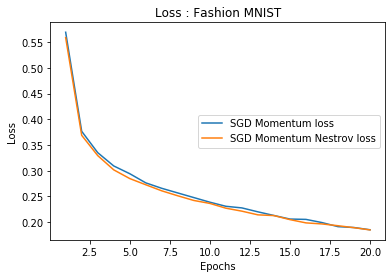

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(1, 21), sgd_m_loss, label='SGD Momentum loss')
#plt.plot(range(1, 21), sgd_loss, label='SGD loss')
plt.plot(range(1, 21), sgd_m_n_loss, label='SGD Momentum Nestrov loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss : Fashion MNIST')
plt.legend(loc='right')
plt.show()

In [31]:
sgd_m_loss

[0.5694982621987661,
 0.3767440482278665,
 0.33517869521776833,
 0.3093085695832968,
 0.29422132956782976,
 0.2763849243511756,
 0.26575749011337757,
 0.25673371552824975,
 0.24775146864851316,
 0.23875760437647503,
 0.2307909741570552,
 0.22764666737616063,
 0.21999910581956308,
 0.21290081896434226,
 0.205950284465154,
 0.2052928565979004,
 0.1990992642879486,
 0.19115929158329964,
 0.1894570823813478,
 0.18511319648623467]

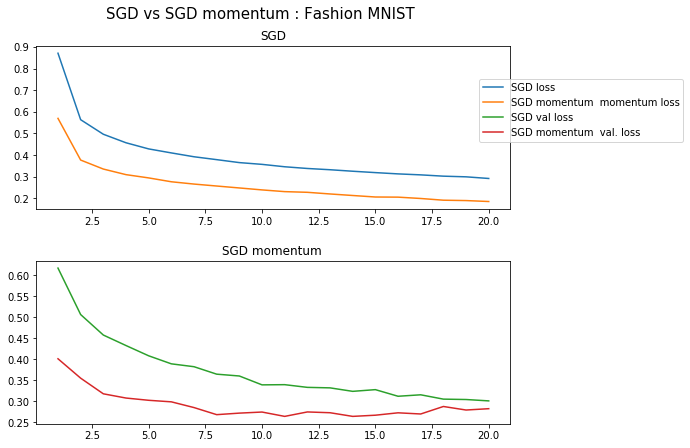

In [32]:
plot_losses(sgd_loss,sgd_m_loss, val_sgd_loss, val_sgd_m_loss,'SGD', 'SGD momentum ')

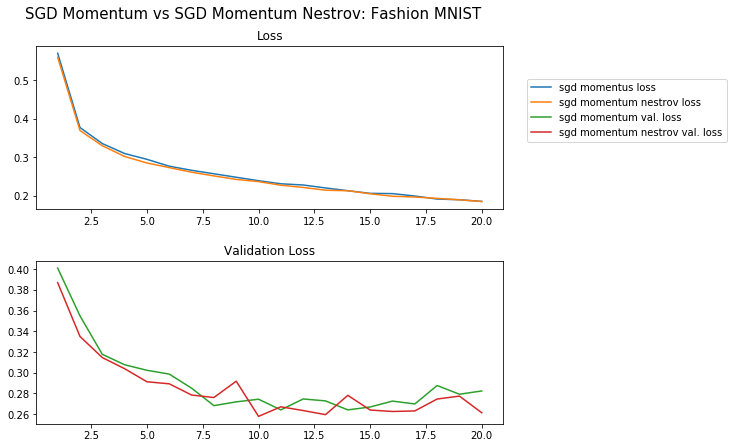

In [33]:
from numpy import linspace
import matplotlib.pyplot as plt

# Calling the axes.prop_cycle returns an itertoools.cycle

color_cycle = plt.rcParams['axes.prop_cycle']()

x = linspace(1, 20, 20)
f1 = x*(1-x)   ; lab1 = 'sgd momentus loss'
f2 = 0.25-f1   ; lab2 = 'sgd momentum nestrov loss' 
f3 = x*x*(1-x) ; lab3 = 'sgd momentum val. loss'
f4 = 0.25-f3   ; lab4 = 'sgd momentum nestrov val. loss'

# let's plot our curves (note the use of color cycle, otherwise the curves colors in
# the two subplots will be repeated and a single legend becomes difficult to read)
fig, (a13, a24) = plt.subplots(2)

a13.plot(x, sgd_m_loss, label=lab1, **next(color_cycle))
a13.plot(x, sgd_m_n_loss, label=lab2, **next(color_cycle))
a13.set_title('Loss')
a24.plot(x, val_sgd_m_loss, label=lab3, **next(color_cycle))
a24.plot(x, val_sgd_m_n_loss, label=lab4, **next(color_cycle))
a24.set_title('Validation Loss')
# so far so good, now the trick

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

#fig.legend(lines, labels)
fig.legend(
  lines,
  labels,
  bbox_to_anchor=(1.45, 0.875),
  bbox_transform=plt.gcf().transFigure,
)
fig.suptitle('SGD Momentum vs SGD Momentum Nestrov: Fashion MNIST',fontsize=15, y=1.03)
fig. tight_layout(pad=0.15)
fig.set_size_inches(7,6, forward=True)
plt.show()

In [40]:
adam_loss = history_adam.history['loss']
val_adam_loss = history_adam.history['val_loss']

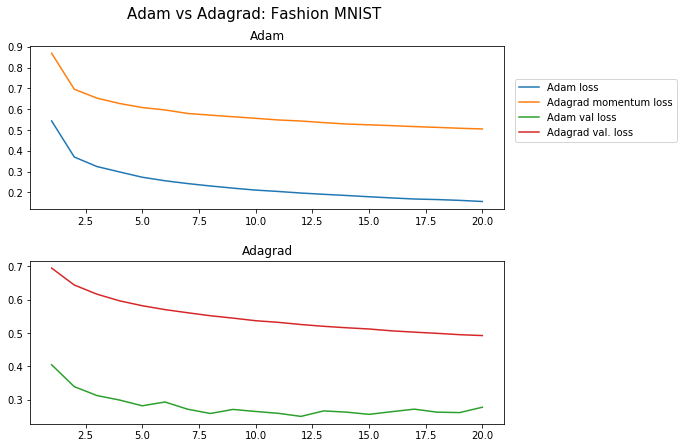

In [41]:
plot_losses(adam_loss,adagrad_loss, val_adam_loss, val_adagrad_loss,'Adam', 'Adagrad')

In [42]:
adamax_loss = history_adamax.history['loss']
val_adamax_loss = history_adamax.history['val_loss']
adamax_loss

[0.625907313656807,
 0.43807201329867046,
 0.38896836227575937,
 0.36052984755833944,
 0.3365115106980006,
 0.31862826749483747,
 0.304804897860686,
 0.29087920945485435,
 0.28042271471818286,
 0.2710719778130452,
 0.26339335629145305,
 0.2564746351043383,
 0.2486925944576661,
 0.2429644183576107,
 0.23846707002818585,
 0.2309134925097227,
 0.22942171154816945,
 0.22184046073953312,
 0.21539437184035778,
 0.2141387382954359]

In [43]:
adadelta_loss = history_adadelta.history['loss']
val_adadelta_loss = history_adadelta.history['val_loss']
adadelta_loss

[2.3051507789611816,
 2.2448405356089274,
 2.1844812854766844,
 2.104603326924642,
 1.998920405515035,
 1.8693354366938273,
 1.7247332726160685,
 1.585585548655192,
 1.465352811940511,
 1.3643704519907633,
 1.2874306504885356,
 1.226493530591329,
 1.1763375192324321,
 1.134885052204132,
 1.0980772806803385,
 1.0684502276420593,
 1.043728831768036,
 1.0159358035405477,
 0.9960076527277628,
 0.9820224980672201]

In [44]:
adagrad_loss = history_adagrad.history['loss']
val_adagrad_loss = history_adagrad.history['val_loss']
adagrad_loss

[0.8687895815849305,
 0.695606479771932,
 0.6527958029429117,
 0.6270185977141063,
 0.6076341817537944,
 0.596140314356486,
 0.5791883431831996,
 0.5711293537537256,
 0.563458129119873,
 0.5559303908665975,
 0.5479043442408243,
 0.542877776614825,
 0.5351144407669703,
 0.5284555744012197,
 0.524610267162323,
 0.5206458185513815,
 0.516060040974617,
 0.5123008763154348,
 0.5080029727220535,
 0.5046014048576355]

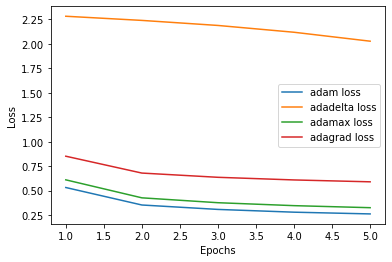

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(1, 6), adam_loss, label='adam loss')
plt.plot(range(1, 6), adadelta_loss,label='adadelta loss')
plt.plot(range(1, 6), adamax_loss,label='adamax loss')
plt.plot(range(1, 6), adagrad_loss,label='adagrad loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='right')
plt.show()

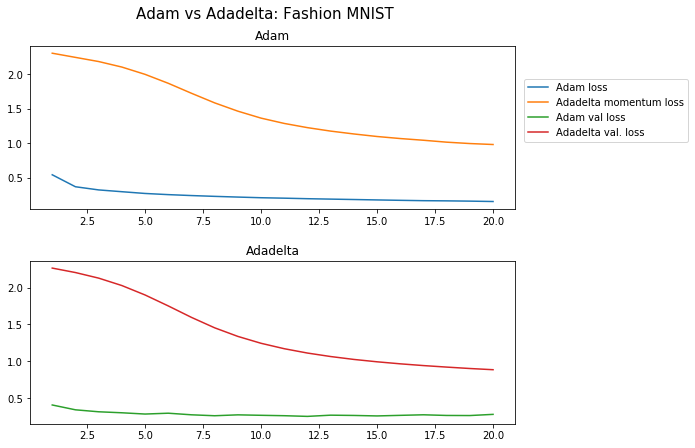

In [45]:
plot_losses(adam_loss,adadelta_loss, val_adam_loss, val_adadelta_loss,'Adam', 'Adadelta')

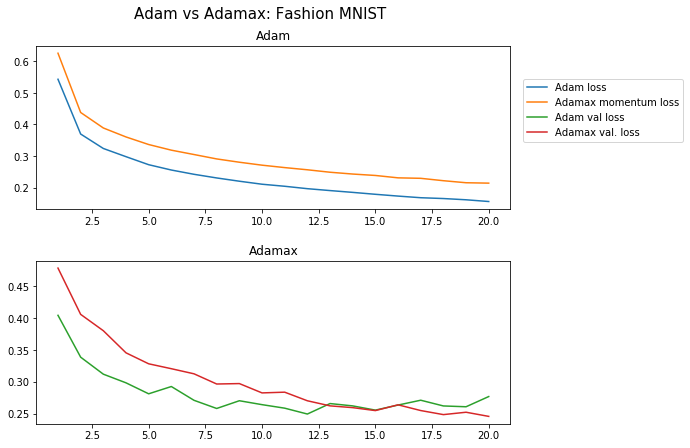

In [46]:
plot_losses(adam_loss,adamax_loss, val_adam_loss, val_adamax_loss,'Adam', 'Adamax')

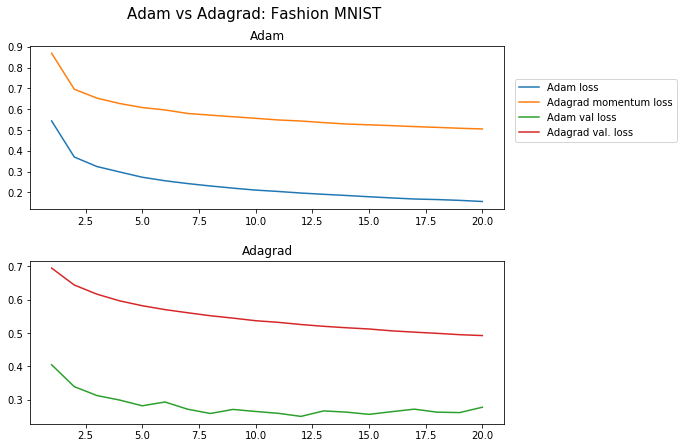

In [47]:
plot_losses(adam_loss,adagrad_loss, val_adam_loss, val_adagrad_loss,'Adam', 'Adagrad')

In [48]:
val_adamax_loss

[0.47872883987426756,
 0.40602520225048067,
 0.3803466169834137,
 0.3456152170062065,
 0.3283747267961502,
 0.320675330722332,
 0.31265158550739286,
 0.29662729279994965,
 0.2973089023590088,
 0.28265871061086656,
 0.2838040868997574,
 0.270305576133728,
 0.2622962117791176,
 0.259510561683774,
 0.2548744694054127,
 0.26393693980574606,
 0.2549509376227856,
 0.248554787504673,
 0.2522924548268318,
 0.24577270613908767]

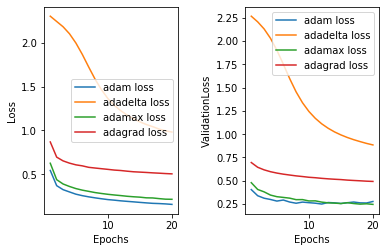

In [52]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(2,2)
import numpy as np
x = range(1, 21)
fig.tight_layout(pad=3.0)

plt.subplot(121)
plt.plot(x, adam_loss, label='adam loss')
plt.plot(x, adadelta_loss,label='adadelta loss')
plt.plot(x, adamax_loss,label='adamax loss')
plt.plot(x, adagrad_loss,label='adagrad loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='right')

plt.subplot(122)
plt.xlabel('Epochs')
plt.ylabel('ValidationLoss')
plt.plot(x, val_adam_loss, label='adam loss')
plt.plot(x, val_adadelta_loss,label='adadelta loss')
plt.plot(x, val_adamax_loss,label='adamax loss')
plt.plot(x, val_adagrad_loss,label='adagrad loss')
plt.legend()
#plt.rcParams["figure.figsize"] = (2,1)
plt.show()